# EDA – Raw Predictive Maintenance Dataset
## Jupiter notebook for EDA to understand dataset and see what needs to be cleaned

## Objective
Understand the raw dataset before preprocessing.

Focus:
- Data structure
- Class imbalance
- Metric distributions
- Outliers
- Basic relationships with failure

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/archive/predictive_maintenance_dataset.csv')

In [3]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [8]:
print(df.shape)
df.describe()


(124494, 12)


,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


First I will create visualizations and statistics to understand data better.
After that I will go into cleaning if needed.

In [12]:


print(df.isnull().sum())


date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64


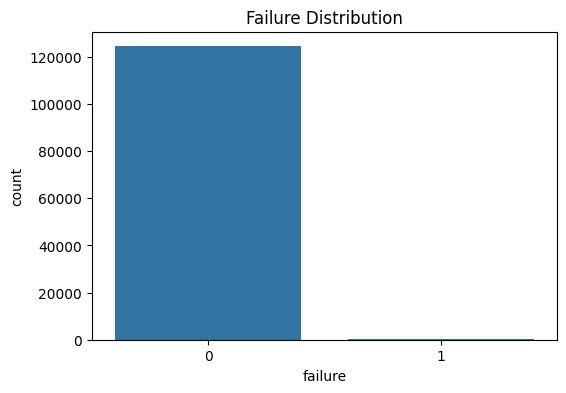

failure
0    0.999149
1    0.000851
Name: proportion, dtype: float64


In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='failure', data=df)
plt.title("Failure Distribution")
plt.show()

print(df['failure'].value_counts(normalize=True))


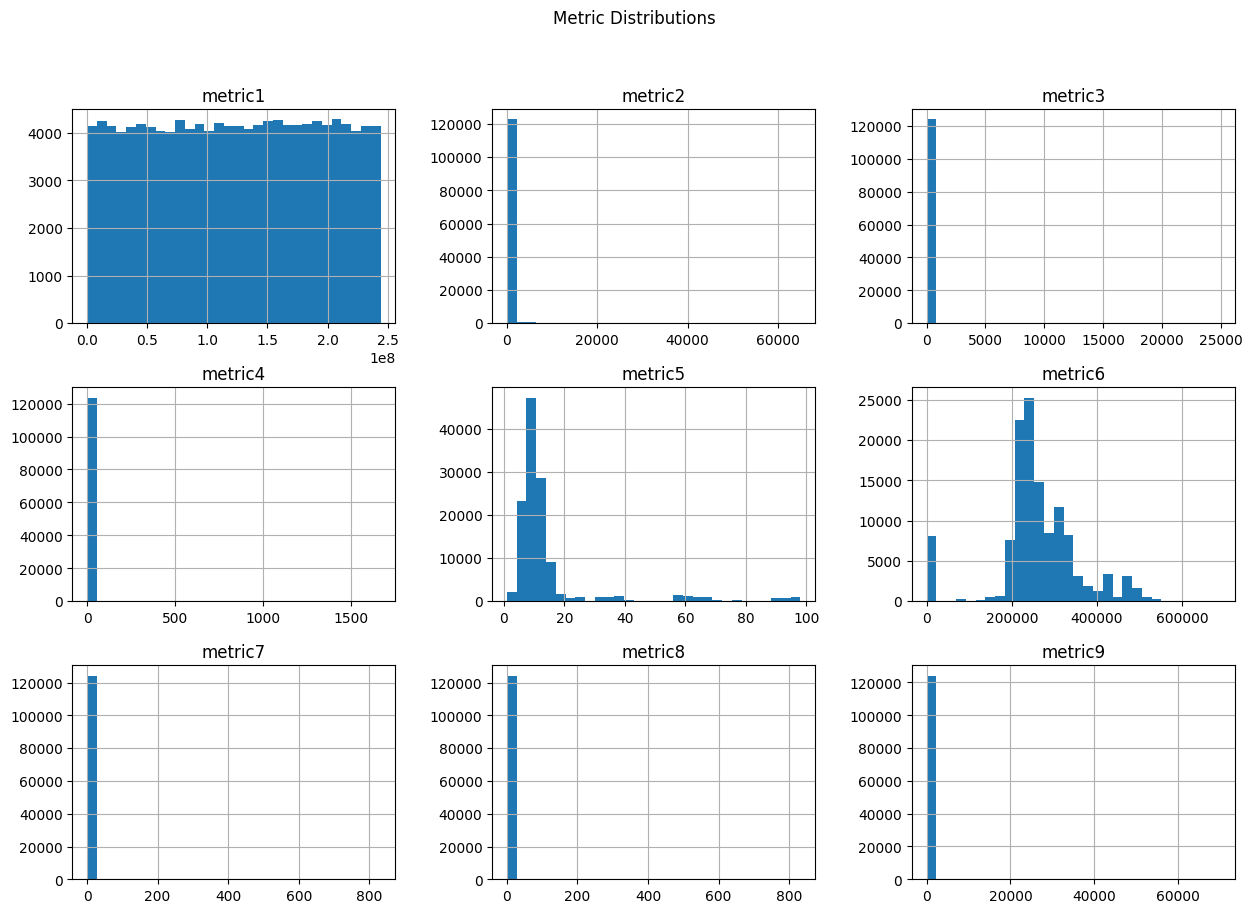

In [14]:
metrics = [col for col in df.columns if 'metric' in col]

df[metrics].hist(figsize=(15,10), bins=30)
plt.suptitle("Metric Distributions")
plt.show()


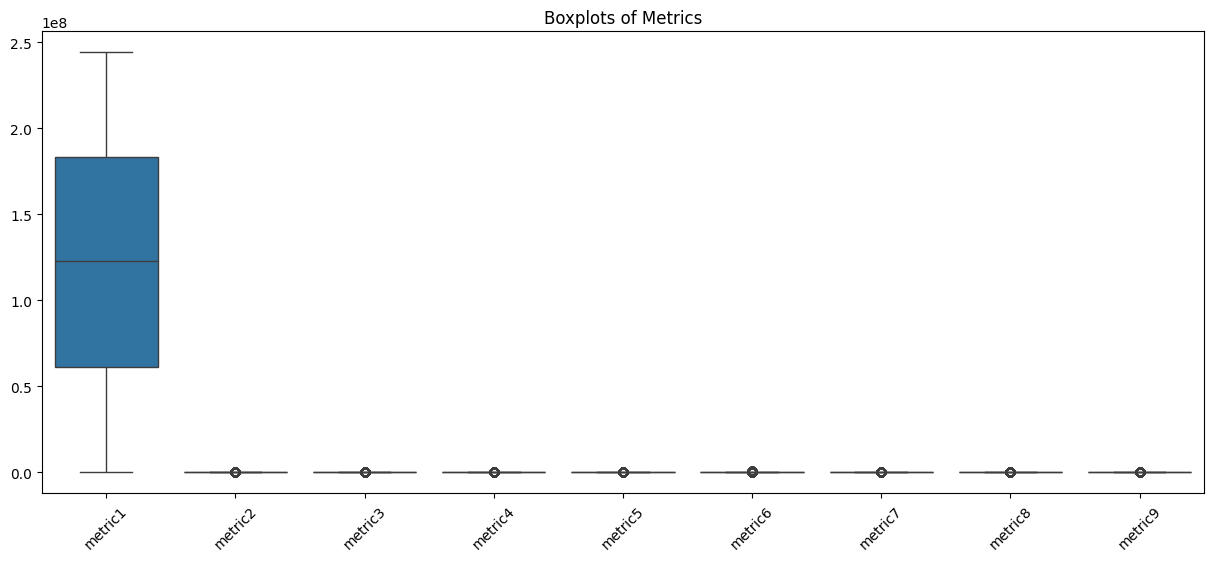

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df[metrics])
plt.xticks(rotation=45)
plt.title("Boxplots of Metrics")
plt.show()


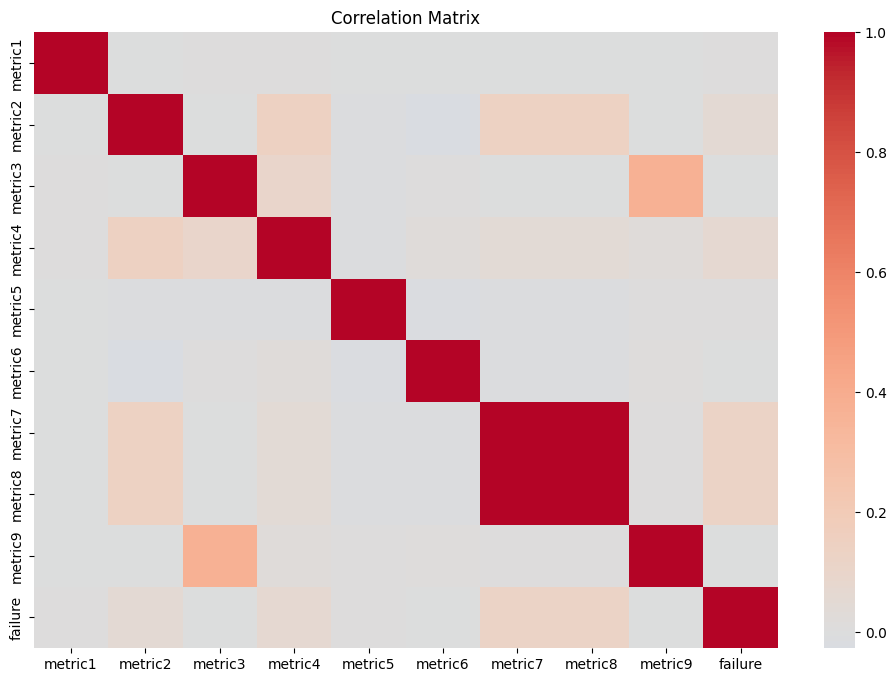

In [16]:
plt.figure(figsize=(12,8))
corr = df[metrics + ['failure']].corr()

sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()


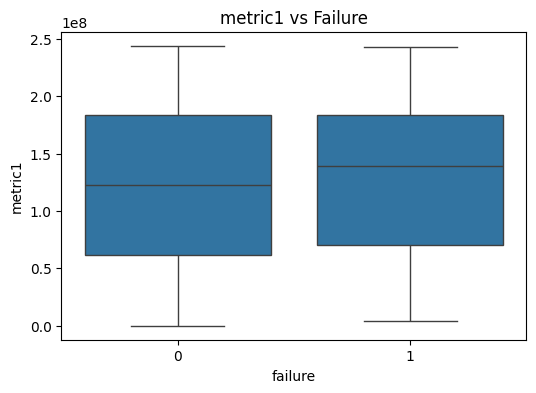

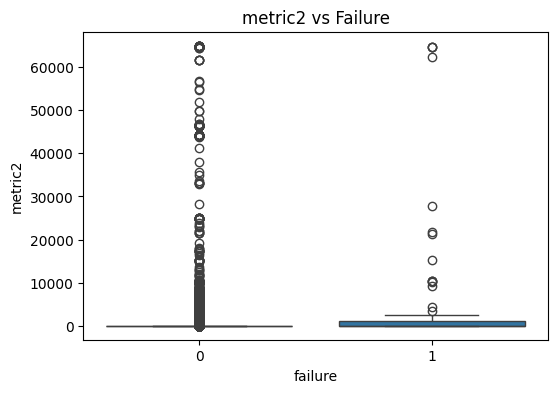

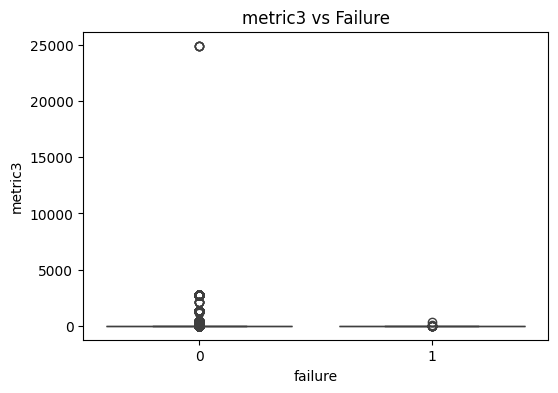

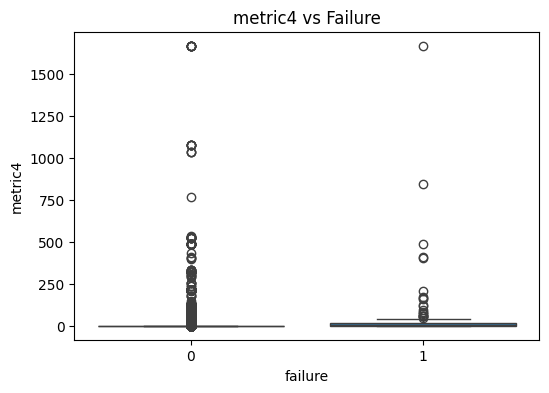

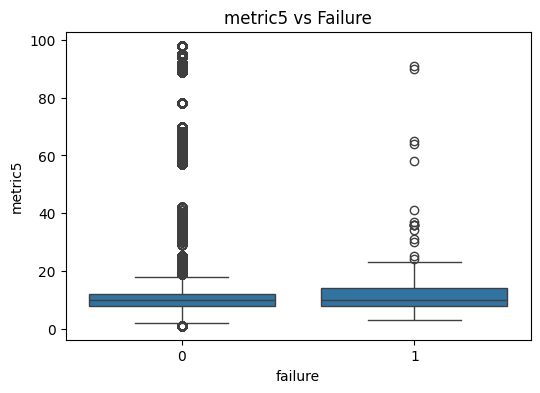

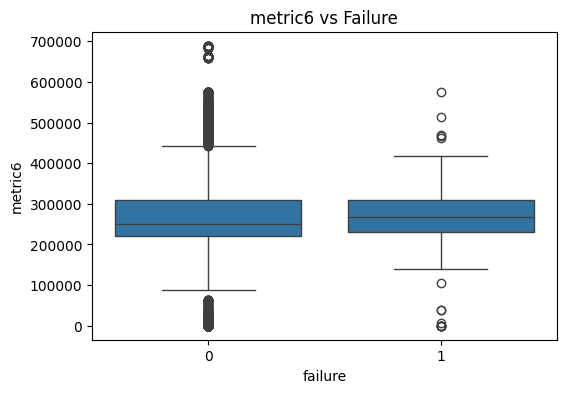

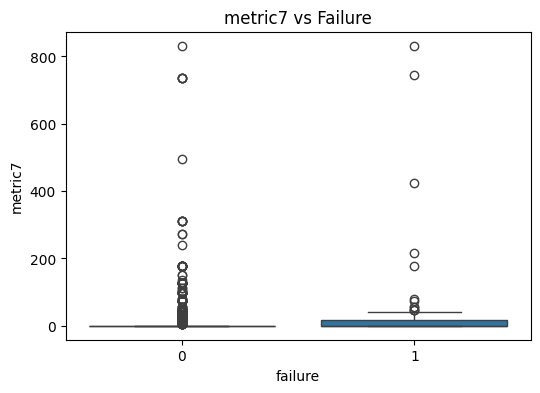

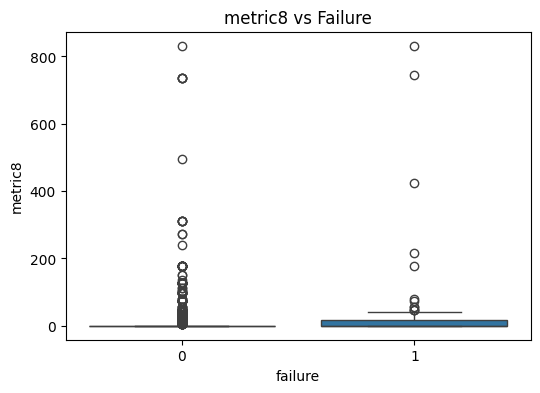

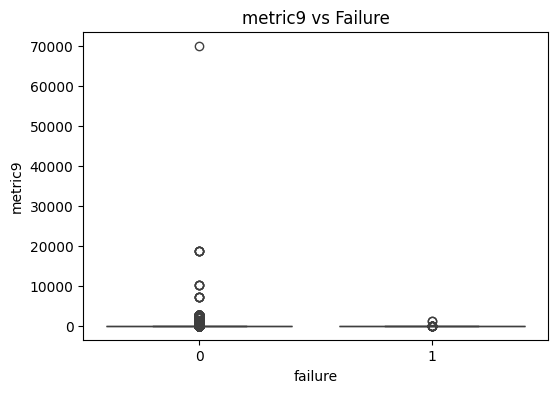

In [17]:
for metric in metrics:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='failure', y=metric, data=df)
    plt.title(f"{metric} vs Failure")
    plt.show()


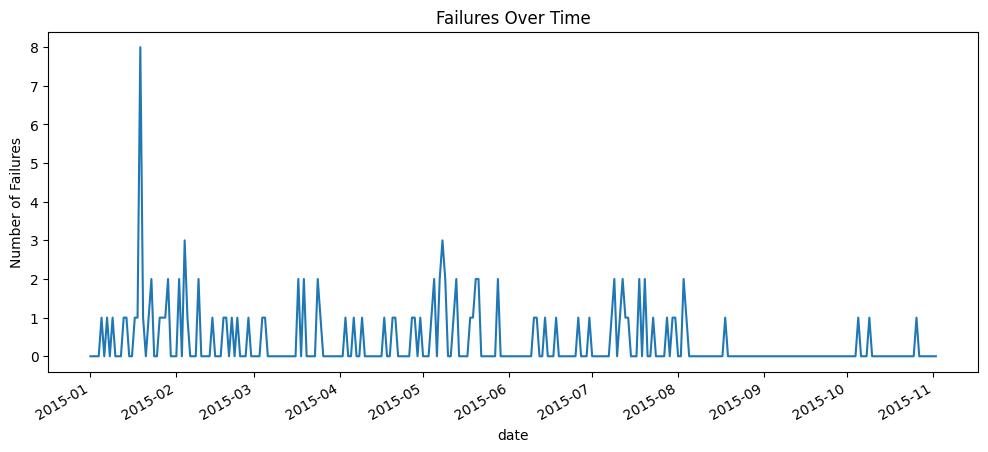

In [18]:
df['date'] = pd.to_datetime(df['date'])

df.groupby('date')['failure'].sum().plot(figsize=(12,5))
plt.title("Failures Over Time")
plt.ylabel("Number of Failures")
plt.show()


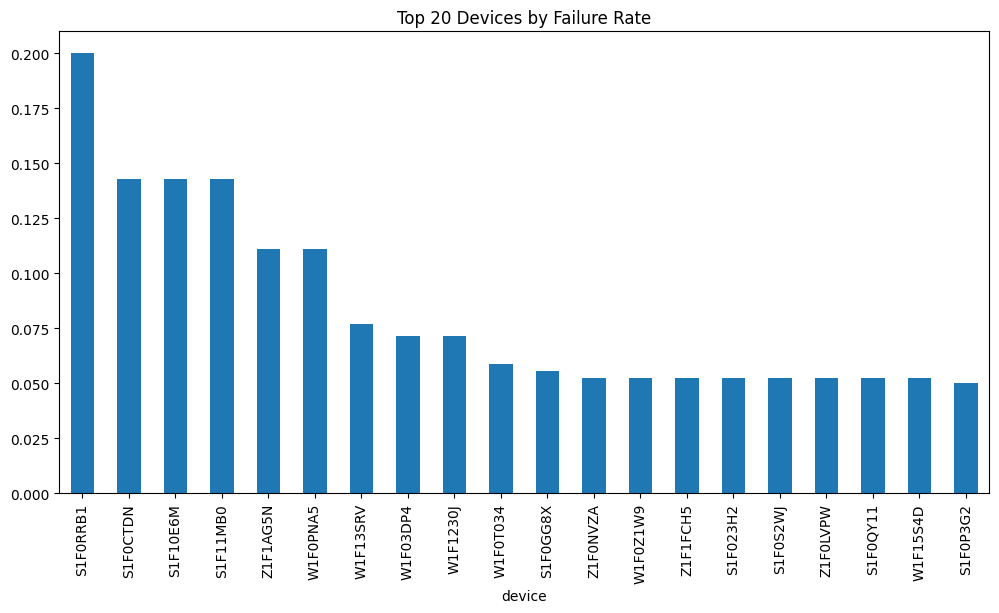

In [19]:
device_failure = df.groupby('device')['failure'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
device_failure.head(20).plot(kind='bar')
plt.title("Top 20 Devices by Failure Rate")
plt.show()


For boxplot metirc 1 dominates scale, I will scale for more informative plot.

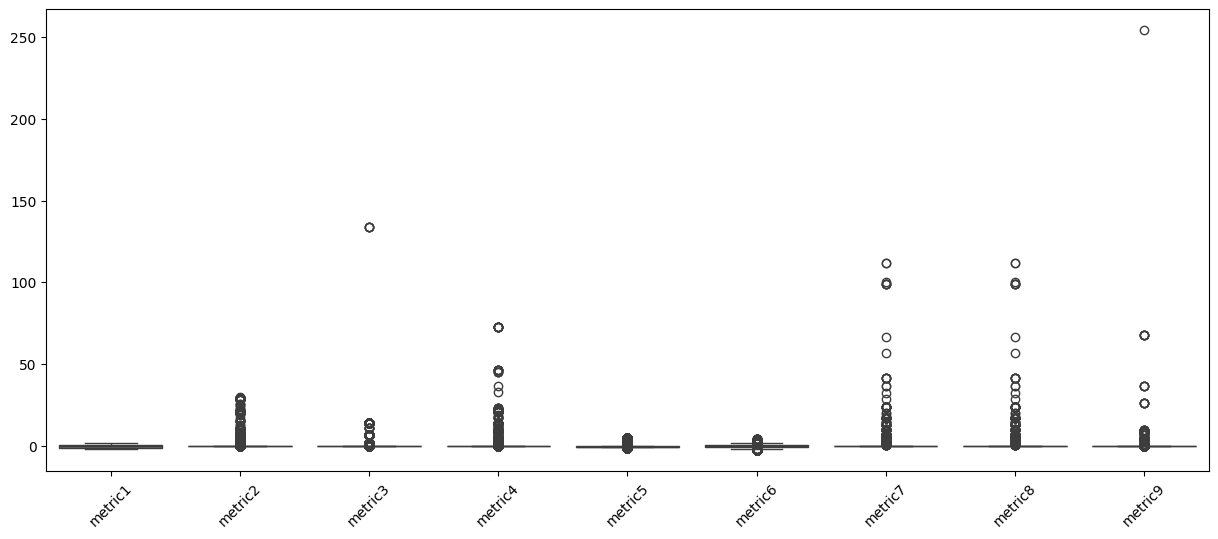

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_metrics = pd.DataFrame(
    scaler.fit_transform(df[metrics]),
    columns=metrics
)

plt.figure(figsize=(15,6))
sns.boxplot(data=scaled_metrics)
plt.xticks(rotation=45)
plt.show()
